In [647]:
import pandas as pd
import numpy as np
from pyairtable import Table
from itertools import chain
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import rgb2hex
from generativepy.color import Color
from PIL import ImageColor
import geopandas as gpd
import datetime as dt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import font_manager
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
import matplotlib.dates as md
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import geopandas
import pycountry
import time
import string
import warnings
warnings.filterwarnings('ignore')

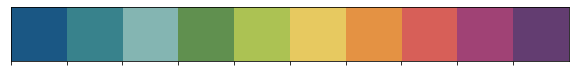

In [12]:
# Define rainbow color palette for categories
rainbow = {
    'Authorization and enforcement': '#1A5784',
    'Contact tracing/Testing': '#38828C',
    'Emergency declarations': '#84B5B2',
    'Enabling and relief measures':'#60904F',
    'Face mask':'#ACC253',
    'Military mobilization':'#E7C960',
    'Social distancing':'#E49243',
    'Support for public health and clinical capacity':'#D75F58',
    'Travel restrictions':'#A04275',
    'Vaccinations':'#633D71'
}

colors = ['#1A5784', '#38828C', '#84B5B2', '#60904F', '#ACC253', '#E7C960', '#E49243', '#D75F58', '#A04275', '#633D71']
sns.palplot(sns.color_palette(colors))



In [13]:
# Define gradient color
gradient = ['#EEEFEF','#ACC253']

cm = LinearSegmentedColormap.from_list(
        "Custom", gradient, N=100)

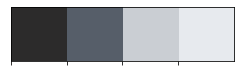

In [14]:
# Define chart color palette
chart = ['#2C2B2B','#565E69','#CACED3','#E7EAEE']
sns.palplot(sns.color_palette(chart))

In [505]:
# Define constants
figure_size = (20,6)

# Define x-axis range
left = dt.date(2010, 1, 1)
right = dt.date(2023, 9, 1)

# Set background
sns.set_context('talk') #change the size from small to medium
sns.set_style('white') #change bg to white

# Add every font at the specified location
font_dir = ['/Users/haileyrobertson/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
# Set font family globally
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.weight'] = 'bold'

# Set margins
plt.rcParams['axes.xmargin'] = 0.9

# Define list of date formats
zfmts = ['', '%Y','%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']

# Format axes 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.titlepad'] = 30

# Format ticks
plt.rcParams["xtick.direction"] = "out"
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.color'] = chart[2]
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.labelcolor'] = chart[1]
plt.rcParams['xtick.labelsize'] = 12

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.pad"] = -35
plt.rcParams["ytick.minor.pad"] = -35
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.size"] = 10
plt.rcParams["ytick.color"] = chart[2]
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.minor.width"] = 0.5
plt.rcParams["ytick.labelcolor"] = chart[1]
plt.rcParams["ytick.labelsize"] = 12


# Adjust fontdict for title
titlefont = {'family': 'Open Sans',
             'color':  chart[0], 
             'weight': 400,
             'size': 20}

# Set grid style
plt.rcParams['grid.color'] = chart[2]
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth']=0.5

# Set legend style
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125



# Set axis labels
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelcolor'] = chart[1]

In [84]:
host = pd.read_csv("data/hpai_host_counts.csv")

In [85]:
host.head()

,t.name,count
0,"""Aves""",63788
1,"""Chroicocephalus ridibundus""",6196
2,"""Cygnus olor""",3936
3,"""Branta canadensis""",1751
4,"""Vulpes vulpes""",1385


In [86]:
# Function to remove the first and last characters from a string
def remove_first_and_last_chars(s):
    return s[1:-1]

In [87]:
host["t.name"] = host["t.name"].apply(remove_first_and_last_chars)

In [88]:
host.head()

,t.name,count
0,Aves,63788
1,Chroicocephalus ridibundus,6196
2,Cygnus olor,3936
3,Branta canadensis,1751
4,Vulpes vulpes,1385


In [89]:
outlier = host.iloc[1:]

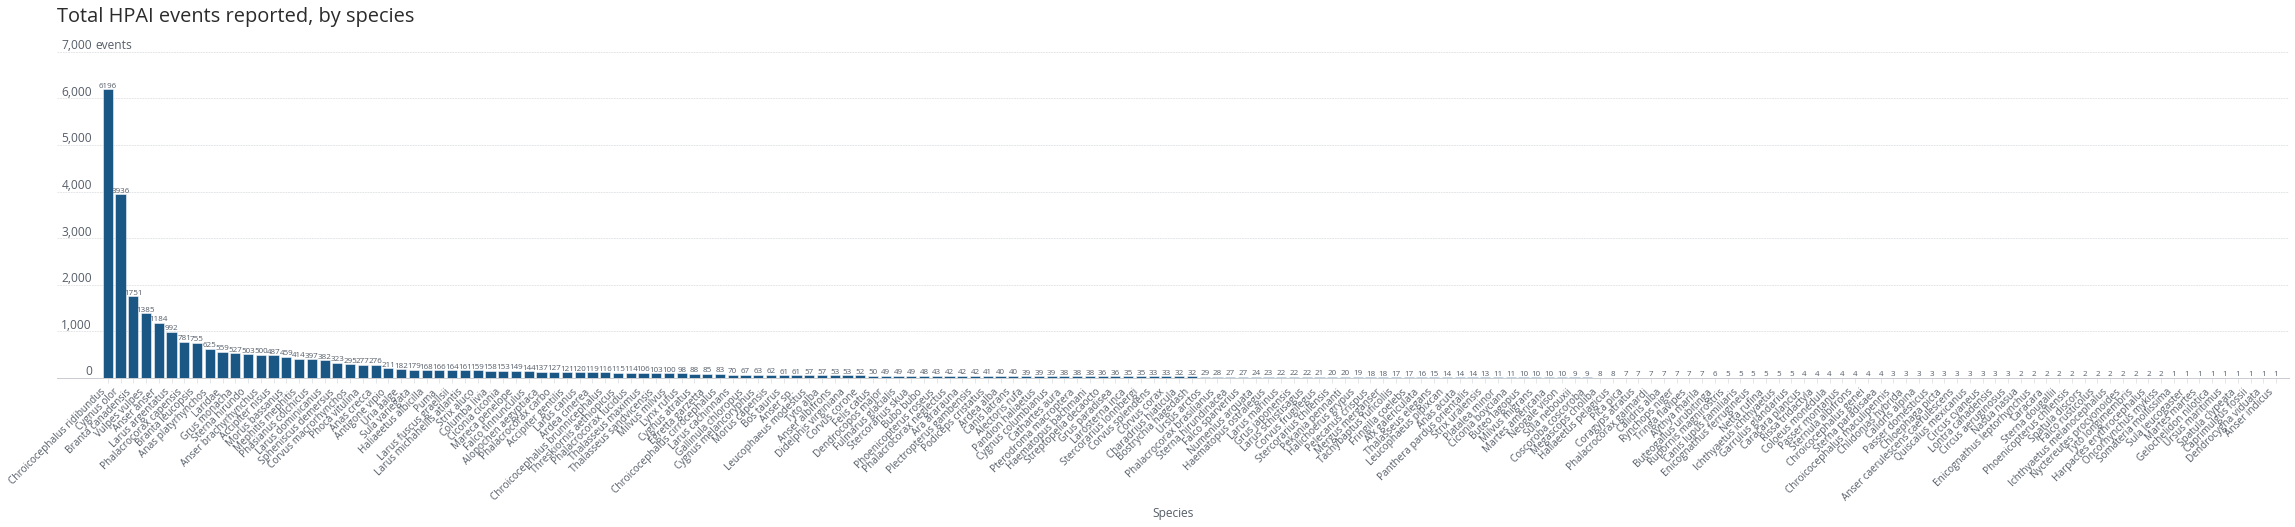

In [99]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size[0] * 2, figure_size[1]))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Plot bars with adjusted width and aligning at the center
bars = plt.bar(outlier['t.name'], outlier['count'], linewidth=0.5, width=0.8, align="center", color=colors[0]) 

# Set title
title = "Total HPAI events reported, by species"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("Species")

# Changes y-axis range
plt.gca().set_ybound(0, 7000)

# Format y-axis label
plt.ylabel("events", rotation=0, loc='top', labelpad=-75, color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# Format x-axis labels with rotation for better readability
plt.xticks(rotation=45, ha='right')

# Set x-axis limits to match the data range
plt.xlim(-4, len(host['t.name']) - 1)

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Add counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, '%d' % int(height), ha='center', va='bottom', fontsize=8, color=chart[1])

# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_events_by_host.jpg', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait', bbox_inches='tight')

In [78]:
cases = pd.read_csv("data/hpai_cases.csv")

In [79]:
cases.head()

,t.name,totalCases
0,"""Aves""",218565182
1,"""Phalacrocorax capensis""",345435
2,"""Chroicocephalus ridibundus""",14985
3,"""Grus monacha""",12368
4,"""Spheniscus demersus""",9454


In [80]:
cases["t.name"] = cases["t.name"].apply(remove_first_and_last_chars)

In [81]:
exclude = cases.iloc[2:]

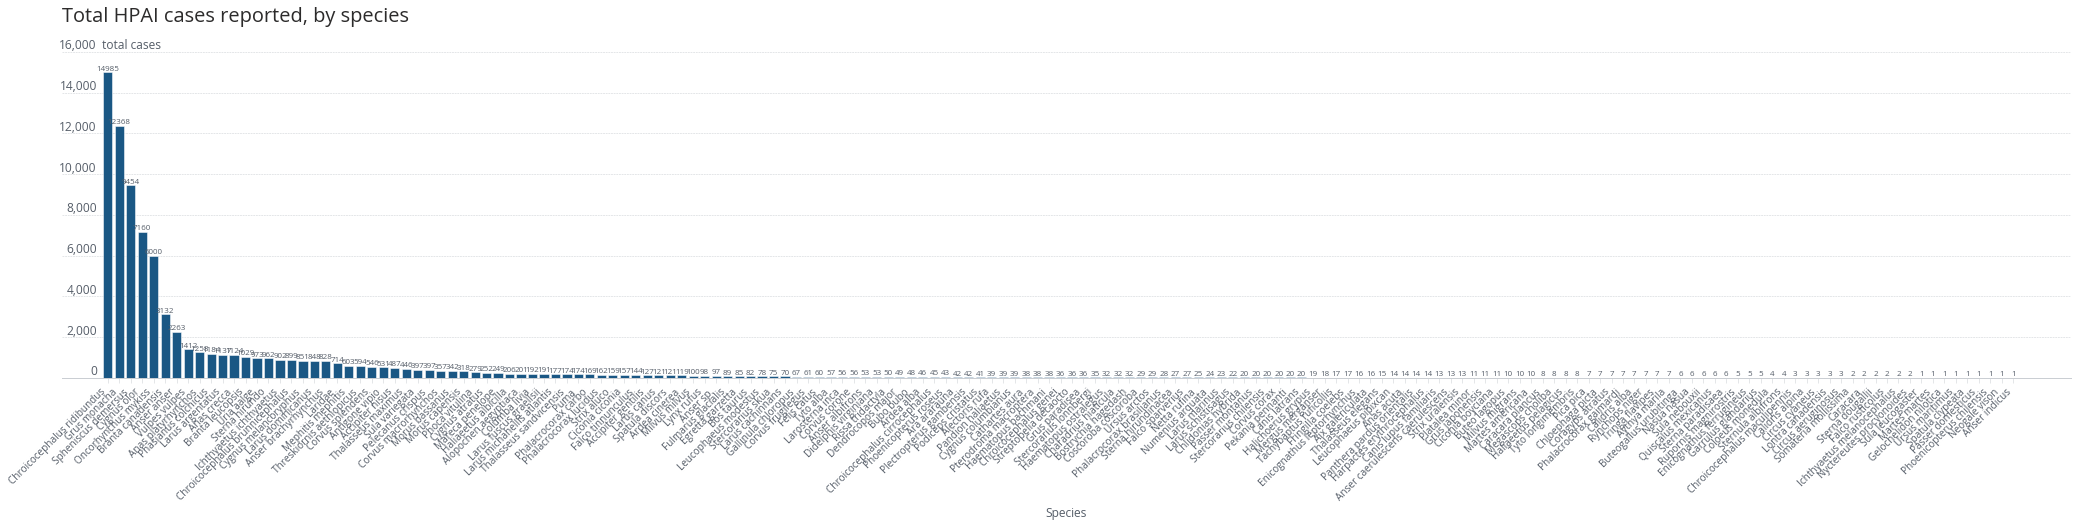

In [97]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size[0] * 2, figure_size[1]))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Plot bars with adjusted width and aligning at the center
bars = plt.bar(exclude['t.name'], exclude['totalCases'], linewidth=0.5, width=0.8, align="center", color=colors[0]) 

# Set title
title = "Total HPAI cases reported, by species"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("Species")

# Changes y-axis range
plt.gca().set_ybound(0, 16000)

# Format y-axis label
plt.ylabel("total cases", rotation=0, loc='top', labelpad=-102, color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# Format x-axis labels with rotation for better readability
plt.xticks(rotation=45, ha='right')

# Set x-axis limits to match the data range
plt.xlim(-4, len(host['t.name']) - 1)

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Add counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, '%d' % int(height), ha='center', va='bottom', fontsize=8, color=chart[1])

# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_cases_by_host.jpg', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [390]:
cases_ot = pd.read_csv("data/hpai_cases_month_10.csv")

In [391]:
cases_ot.sort_values(by="monthlyCases")

,yearMonth,species,monthlyCases
27,"""2021-06""","""Cygnus olor""",1
22,"""2021-05""","""Larus argentatus""",1
129,"""2023-03""","""Anas platyrhynchos""",1
148,"""2023-07""","""Larus argentatus""",2
145,"""2023-06""","""Vulpes vulpes""",2
...,...,...,...
130,"""2023-04""","""Aves""",3507170
78,"""2022-10""","""Aves""",6497019
98,"""2022-12""","""Aves""",9340939
87,"""2022-11""","""Aves""",10032905


In [392]:
cases_ot["yearMonth"] = cases_ot["yearMonth"].apply(remove_first_and_last_chars)

In [393]:
# Assuming you have the DataFrame as df
# Convert yearMonth to a date
# Convert yearMonth to a date
cases_ot['yearMonth'] = pd.to_datetime(cases_ot['yearMonth'], format="%Y-%m")

# Convert monthlyCases to an integer
cases_ot['monthlyCases'] = cases_ot['monthlyCases'].astype(int)

# Remove quotation marks from species
cases_ot['species'] = cases_ot['species'].str.strip('"')

In [394]:
# Convert yearMonth to a date
cases_ot['yearMonth'] = pd.to_datetime(cases_ot['yearMonth'], format='%Y-%m-%d')

In [381]:
# Filter out rows with specific species names (e.g., 'Aves', 'Phalacrocorax capensis')
species_to_exclude = ['Aves','Phalacrocorax capensis']
cases_ot = cases_ot[~cases_ot['species'].isin(species_to_exclude)]

In [382]:
# Pivot the DataFrame with species as columns
pt = cases_ot.pivot_table(index='yearMonth', columns='species', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
pt.reset_index(inplace=True)

# Set 'yearMonth' as the index again
pt.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
pt = pt.asfreq('MS',fill_value=0).reset_index()

In [383]:
pivot_table.head()

species,yearMonth,Anas platyrhynchos,Anser anser,Branta canadensis,Chroicocephalus ridibundus,Cygnus olor,Grus monacha,Larus argentatus,Phasianus colchicus,Spheniscus demersus,Vulpes vulpes
0,2020-10-01,0,9,0,0,0,0,0,0,0,0
1,2020-11-01,0,0,0,0,8,0,0,0,0,0
2,2020-12-01,0,2,25,0,74,0,0,0,0,0
3,2021-01-01,0,0,0,0,89,0,0,0,0,0
4,2021-02-01,0,0,0,0,0,0,0,0,0,0


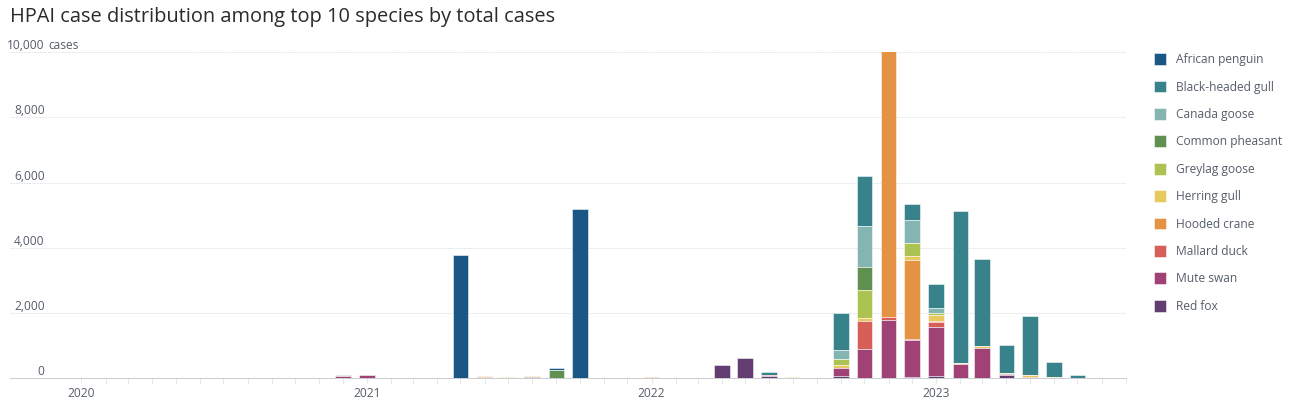

In [384]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pt['yearMonth']
y1=pt['Spheniscus demersus']
y2=pt['Chroicocephalus ridibundus']
y3=pt['Branta canadensis']
y4=pt['Phasianus colchicus']
y5=pt['Anser anser']
y6=pt['Larus argentatus']
y7=pt['Grus monacha']
y8=pt['Anas platyrhynchos']
y9= pt['Cygnus olor']
y10 = pt['Vulpes vulpes']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='African penguin') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Black-headed gull')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Canada goose')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Common pheasant')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Greylag goose')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='Herring gull')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Hooded crane')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[7], label='Mallard duck')
plt.bar(x, y9, bottom=y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Mute swan')
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Red fox')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,10000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among top 10 species by total cases"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("cases", rotation=0,loc='top',labelpad=-72,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.15,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_cases_month_10.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [443]:
cl = pd.read_csv('data/hpai_cases_month_all.csv')

In [451]:
cl.sort_values(by=['taxonomicClasses','species'])

,yearMonth,species,taxonomicClasses,monthlyCases
17,2007-01-01,Oncorhynchus mykiss,Actinopteri,1014000
188,2021-08-01,Accipiter gentilis,Aves,3042
207,2021-10-01,Accipiter gentilis,Aves,3042
213,2021-11-01,Accipiter gentilis,Aves,1014
222,2021-12-01,Accipiter gentilis,Aves,507
...,...,...,...,...
525,2023-02-01,Vulpes vulpes,Mammalia,1690
554,2023-03-01,Vulpes vulpes,Mammalia,4056
584,2023-04-01,Vulpes vulpes,Mammalia,19266
613,2023-05-01,Vulpes vulpes,Mammalia,2197


In [445]:
cl["yearMonth"] = cl["yearMonth"].apply(remove_first_and_last_chars)

In [446]:
# Assuming you have the DataFrame as df
# Convert yearMonth to a date
# Convert yearMonth to a date
cl['yearMonth'] = pd.to_datetime(cl['yearMonth'], format="%Y-%m")

# Convert monthlyCases to an integer
cl['monthlyCases'] = cl['monthlyCases'].astype(int)

# Remove quotation marks from species
cl['species'] = cl['species'].str.strip('"')
cl["taxonomicClasses"] = cl["taxonomicClasses"].apply(remove_first_and_last_chars)
cl['taxonomicClasses'] = cl['taxonomicClasses'].str.strip('"')

In [447]:
# Convert yearMonth to a date
cl['yearMonth'] = pd.to_datetime(cl['yearMonth'], format='%Y-%m-%d')

In [450]:
# Custom function to fill taxonomicClasses with species name if it's 'Aves'
def fill_tax_class(row):
    if row['species'] == 'Aves':
        return 'Aves'
    return row['taxonomicClasses']

# Apply the custom function to fill the taxonomicClasses column
cl['taxonomicClasses'] = cl.apply(fill_tax_class, axis=1)

In [452]:
# Pivot the DataFrame with species as columns
cla = cl.pivot_table(index='yearMonth', columns='taxonomicClasses', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
cla.reset_index(inplace=True)

# Set 'yearMonth' as the index again
cla.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
cla = cla.asfreq('MS',fill_value=0).reset_index()

In [453]:
cla.sort_values(by='yearMonth')

taxonomicClasses,yearMonth,Actinopteri,Aves,Mammalia
0,2005-07-01,0,691717,0
1,2005-08-01,0,4987697,0
2,2005-09-01,0,7436,0
3,2005-10-01,0,4036734,0
4,2005-11-01,0,7715526,0
...,...,...,...,...
212,2023-03-01,0,253553404,28054
213,2023-04-01,0,592909629,24674
214,2023-05-01,0,58263764,3380
215,2023-06-01,0,51335440,338


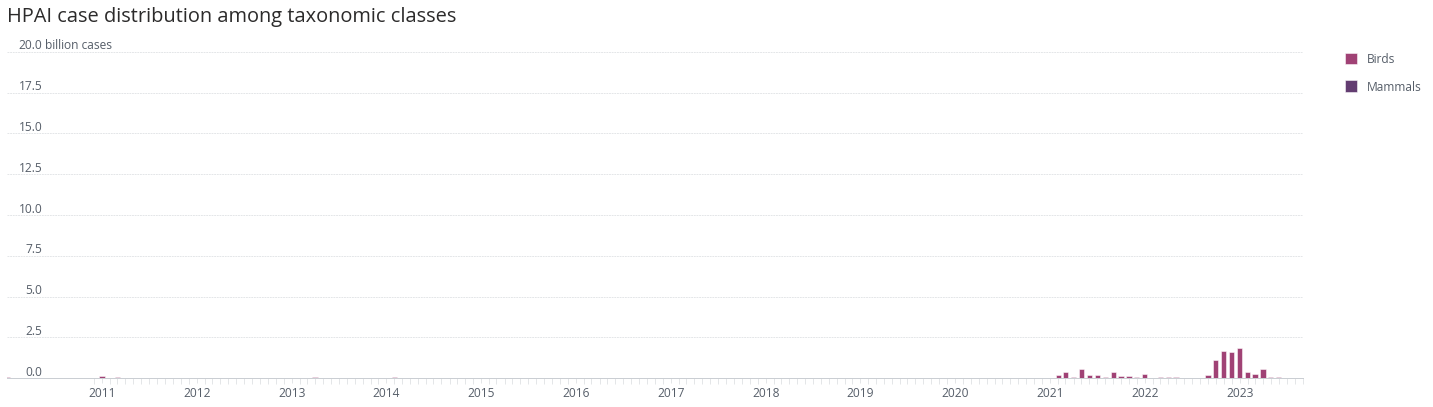

In [506]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = cla['yearMonth']
y1 = cla['Aves']
y2 = cla['Mammalia']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2, linewidth=0.5,width=20, align="center", color=colors[8], label='Birds')
plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Mammals')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,20000000000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among taxonomic classes"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:10]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("billion cases", rotation=0,loc='top',labelpad=-105,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# Custom label formatter for y-axis
def billions_formatter(x, pos):
    return float(x/1e9)

# Apply the custom label formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# # after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
plt.show()
# plt.savefig('figures/hpai_cases_class_all.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [497]:
# Filter out rows with specific species names (e.g., 'Aves', 'Phalacrocorax capensis')
classes_to_exclude = ['Aves']
new = cl[~cl['taxonomicClasses'].isin(classes_to_exclude)]

In [499]:
# Pivot the DataFrame with species as columns
new = new.pivot_table(index='yearMonth', columns='taxonomicClasses', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
new.reset_index(inplace=True)

# Set 'yearMonth' as the index again
new.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
new = new.asfreq('MS',fill_value=0).reset_index()

In [500]:
new.head()

taxonomicClasses,yearMonth,Actinopteri,Mammalia
0,2007-01-01,1014000,0
1,2007-02-01,0,0
2,2007-03-01,0,0
3,2007-04-01,0,0
4,2007-05-01,0,0


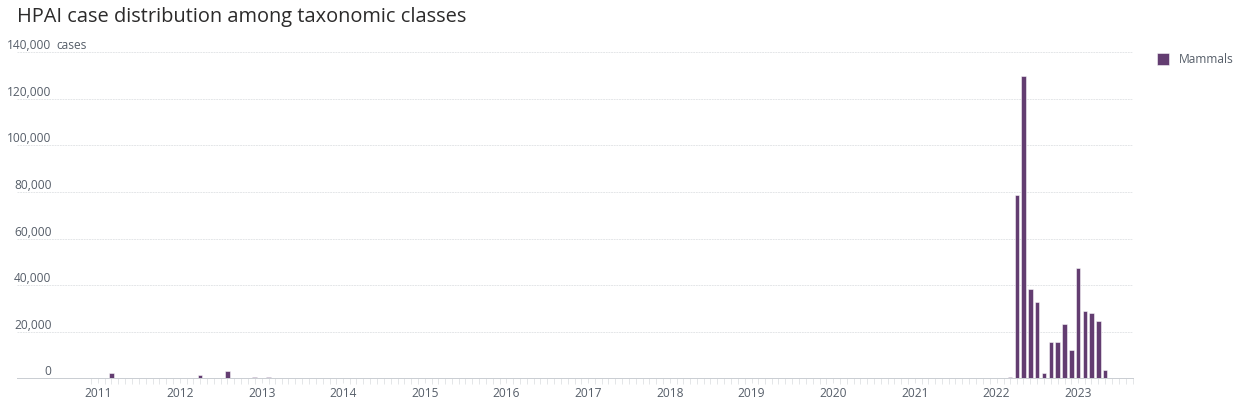

In [518]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = new['yearMonth']
y2 = new['Mammalia']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Mammals')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,140000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among taxonomic classes"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:10]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("cases", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# # Custom label formatter for y-axis
# def billions_formatter(x, pos):
#     return float(x/1e9)

# # Apply the custom label formatter to y-axis
# ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
plt.show()
# plt.savefig('figures/hpai_cases_mammals_all.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [803]:
human = pd.read_csv("data/flunet_2020_total.csv")
animals = pd.read_csv("data/wahis_2020_total.csv")
full = pd.concat([human, animals], ignore_index=True)

In [804]:
full["iso3"] = full["iso3"].apply(remove_first_and_last_chars)
full["species"] = full["species"].apply(remove_first_and_last_chars)
full['flua']=full['flua'].apply(remove_first_and_last_chars)

In [805]:
# Use conditional logic to create separate columns for 'Homo sapiens' and aggregate for other species
merged = full.pivot_table(index=['iso3'], columns=full['species'].eq('Homo sapiens'), values='fluCases', aggfunc='sum').reset_index()

# Rename the columns
merged.rename(columns={True: 'Human cases', False: 'Non-human cases'}, inplace=True)

# Fill NaN values (no 'Homo sapiens' cases for a specific iso3) with 0
merged.fillna(0, inplace=True)

# Convert float columns to integers (optional, if you want the values to be integers)
merged = merged.astype({'Human cases': int, 'Non-human cases': int})


In [806]:
# Normalize 'humans' and 'animals' attributes to [0, 1] range for consistent colors.
merged['Human_normalized'] = (merged['Human cases'] - merged['Human cases'].min()) / (merged['Human cases'].max() - merged['Human cases'].min())
merged['nonHuman_normalized'] = (merged['Non-human cases'] - merged['Non-human cases'].min()) / (merged['Non-human cases'].max() - merged['Non-human cases'].min())

In [807]:
merged.sort_values(by="nonHuman_normalized")

species,iso3,Non-human cases,Human cases,Human_normalized,nonHuman_normalized
0,AFG,0,193,0.001842,0.000000
87,MOZ,0,182,0.001737,0.000000
86,MNG,0,1785,0.017033,0.000000
84,MMR,0,16,0.000153,0.000000
83,MLT,0,869,0.008292,0.000000
...,...,...,...,...,...
135,ZAF,8758692,474,0.004523,0.635482
93,NGA,9420778,54,0.000515,0.683519
34,ECU,10599232,512,0.004886,0.769021
80,MEX,12887308,11734,0.111970,0.935031


In [808]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"iso3"})
cols = ['name','iso3','geometry']
world = world[cols]
world = world.sort_values(by="iso3")

In [809]:
# Fix issues in geopandas
world.loc[world['name'] == 'France', 'iso3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso3'] = 'RKS'

In [810]:
merge = pd.merge(world,merged,on='iso3',how='outer')

In [811]:
merge = merge[(merge.name != "Antarctica")]

In [812]:
# Define the bins
bins = 3

# Bin the first variable - x
merge['Human'] = pd.cut(merge['Human_normalized'], bins=bins, include_lowest=True)
merge['Human'] = merge['Human'].astype('str')

# Bin the second variable - y
merge['Non-human'] = pd.cut(merge['nonHuman_normalized'], bins=bins, include_lowest=True)
merge['Non-human'] = merge['Non-human'].astype('str')

In [813]:
# # Code created x bins to 1, 2, 3
# x_class_codes = np.arange(1, bins)
# d = dict(zip(merge['Human'].value_counts().sort_index().index, x_class_codes))
# merge['Human'] = merge['Human'].replace(d)

# # Code created y bins to A, B, C
# y_class_codes = ['A', 'B', 'C']
# d = dict(zip(merge['Non-human'].value_counts().sort_index().index, y_class_codes))
# merge['Non-human'] = merge['Non-human'].replace(d)

KeyError: 'Human'

In [814]:
# Combine x and y codes to create Bi_Class
merge['Bi_Class'] = merge['Human'].astype('str') + merge['Non-human'].astype('str')

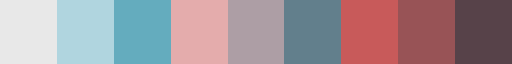

In [815]:
# All colors to create a complete legend
all_colors = ['#e8e8e8', '#b0d5df', '#64acbe', '#e4acac', '#ad9ea5', '#627f8c', '#c85a5a', '#985356', '#574249']
cmap = matplotlib.colors.ListedColormap(all_colors)
cmap


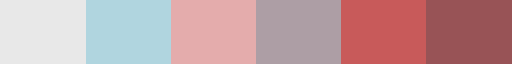

In [816]:
# Set of colors matching the elements of Bi_Class
# We have to exclude those that did not come up in the data
colors = ['#e8e8e8', # 1A
          '#b0d5df', # 1B
          # '#64acbe', # 1C
          '#e4acac', # 2A
          '#ad9ea5', # 2B
          # '#627f8c', # 2C
          '#c85a5a', # 3A
          '#985356'] # 3B
          # '#574249'] # 3C
            
cmap = matplotlib.colors.ListedColormap(colors)
cmap



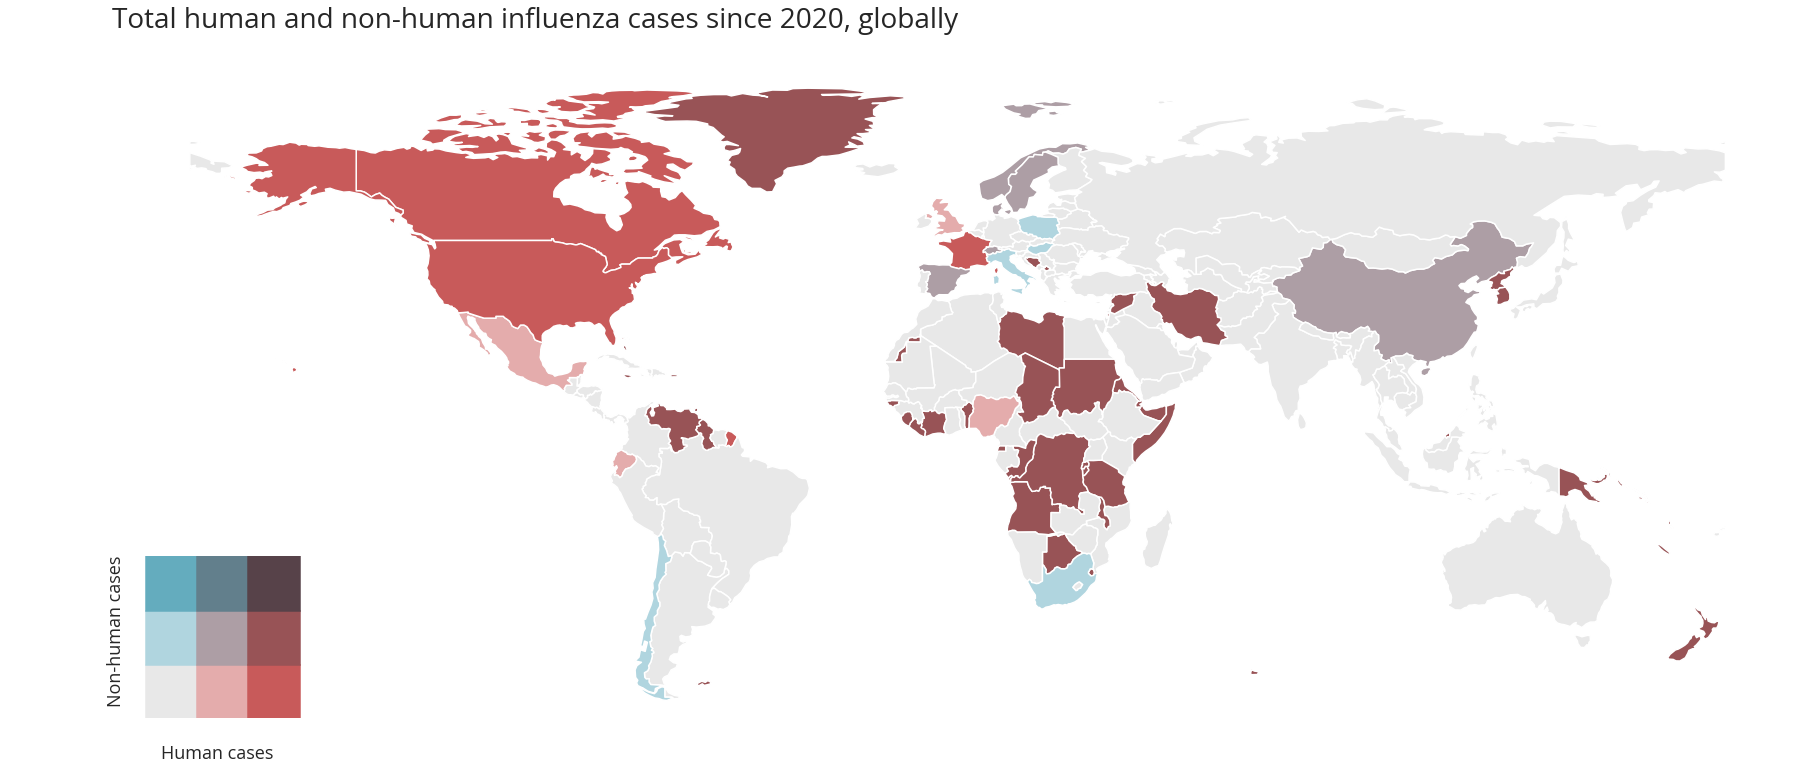

In [889]:
fig, ax = plt.subplots(figsize=(24,18))

# Adjust margins and set title
ax.margins(x=0.05) 


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')

# Plot the map
merge.plot(ax=ax,
           column='Bi_Class',
           cmap=cmap,
           categorical = True,
           legend = False)

plt.tight_layout() # "tighten" two figures map and basemap
plt.axis('off') # we don't need axis with coordinates
ttl = ax.set_title('Total human and non-human influenza cases since 2020, globally',fontsize=28)
ttl.set_position([0.25,1.05])


# Step 2: draw the legend

# We're drawing a 3x3 "box" as 3 columns
# The xmin and xmax arguments axvspan are defined to create equally sized small boxes

img2 = fig # refer to the main figure
ax2 = fig.add_axes([-0.05, 0.25, 0.25, 0.125]) # add new axes to place the legend there
                                         # and specify its location 
alpha = 1 # alpha argument to make it more/less transperent

# Column 1
ax2.axvspan(xmin=0, xmax=0.33, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[0])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[1])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[2])

# Column 2
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[3])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[4])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[5])

# Column 3
ax2.axvspan(xmin=0.66, xmax=1, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[6])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[7])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[8])

# Step 3: annoate the legend
ax2.tick_params(axis='both', which='both', length=0) # remove ticks from the big box
ax2.axis('off'); # turn off its axis
ax2.text(s='Human cases', x=0.1, y=-0.25) # annotate x axis
ax2.text(s='Non-human cases', x=-0.25, y=0.1, rotation=90); # annotate y axis
# ax2.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for x 
# ax2.annotate("", xy=(1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for y 
# plt.savefig('figures/bivariate_choropleth.png', dpi=1200,facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')
plt.tight_layout()
plt.show()
